<a href="https://colab.research.google.com/github/ChinnamLakshmiDurga/LGMVIP-DataScience/blob/main/Iris_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Let's Grow More**
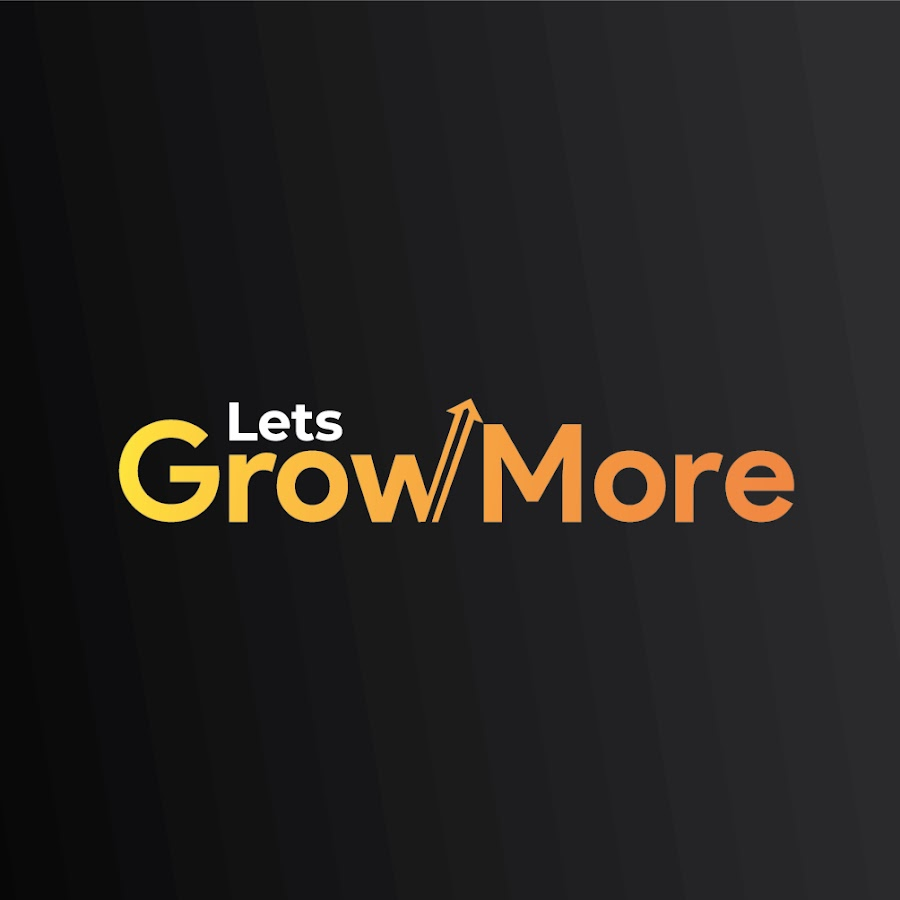
## **Virtual Internship Programme - Data Analytics**

>**Beginner Level Task - Iris Flower Classification**


> #### *This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.*

1. Import libraries and Load DataSet

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/content/sample_data/Iris[1].csv")

2. View few samples of the Data

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


3. Drop unnecessary column in the Data

In [ ]:
data=data.drop(columns="Id")
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


4. View Data Desciption

In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


5. View Data Structure 


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


6. Count the number of samples of each class

In [ ]:
data["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

7. Check for the presence of Missing Values

In [ ]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

8. Plot Histograms for each attribute to visualize the data

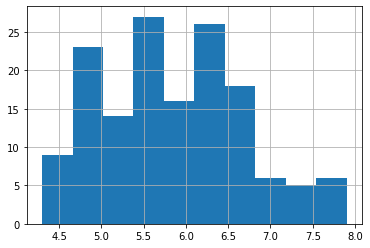

In [ ]:
data["SepalLengthCm"].hist()

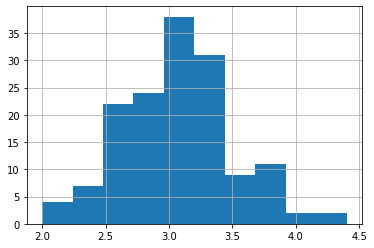

In [ ]:
data["SepalWidthCm"].hist()

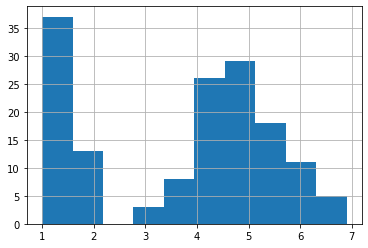

In [ ]:
data["PetalLengthCm"].hist()

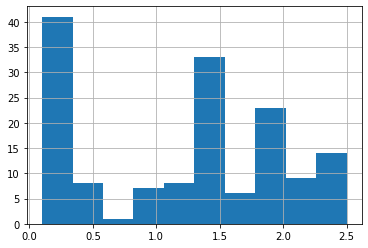

In [ ]:
data["PetalWidthCm"].hist()

8. Plot Scatter Plot on the Data

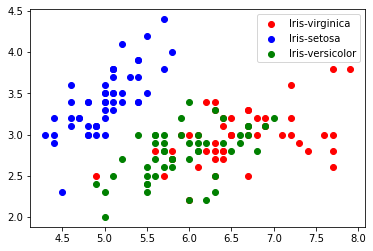

In [ ]:
colors = ["red","blue","green"]
species=["Iris-virginica","Iris-setosa","Iris-versicolor"]
for i in range(3):
  x=data[data["Species"]==species[i]]
  plt.scatter(x["SepalLengthCm"],x["SepalWidthCm"],c=colors[i],label=species[i])
plt.xlabel="SepalLengthCm"
plt.ylabel="SepalWidthCm"
plt.legend()

9. Find the Correlation value and Visualize it

In [ ]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


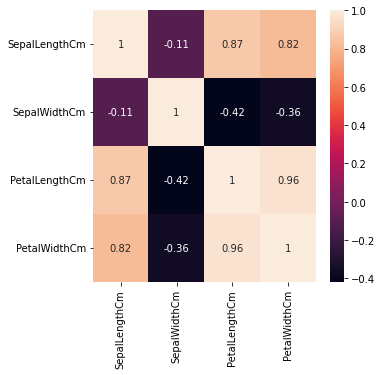

In [ ]:
corr = data.corr()
fig,axis = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot= True)

10. Import library to encode Class Label(Categorical) to Numerical value

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

11. Encode attribute "Species" to numerical value

In [ ]:
data["Species"]=le.fit_transform(data["Species"])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


12. Import library to split the data into Train and Test data

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=["Species"])
Y=data["Species"]
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3 )

`13. Use Logistic Regression approach to fit the data and Check Accuracy Value`

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


14. Use K-Nearest Neighbors approach to fit the data and Check Accuracy Value

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1= KNeighborsClassifier()
model1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("Accuracy: ",model1.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


15. Use Decision Tree approach to fit the data and Check Accuracy Value

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2= DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print("Accuracy: ",model2.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


### Since we have obtained a accuracy value of 97.77% using Logistic Regression and K-Nearest Neighbors already and It is also not a good practice to train our model till we get a 100% accuracy since it'd be susceptible to outliers if we accquire a 100% accuracy.
## So, We can stop training our model further. 